# Calculating portfolio returns

In [1]:
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from pandas_datareader import DataReader
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [18,16]

In [2]:
stocklist = ['ITUB4.SA', 'B3SA3.SA', 'PETR4.SA', 'BBDC4.SA', 'ABEV3.SA', \
             'MGLU3.SA', 'BBAS3.SA', 'WEGE3.SA', 'VALE3.SA', 'JBSS3.SA']

start = datetime(2019,1,1)
end = datetime(2019,12,31)

StockReturns = DataReader(stocklist, 'yahoo',start, end)['Adj Close'].pct_change()
StockReturns.tail()

Symbols,ITUB4.SA,B3SA3.SA,PETR4.SA,BBDC4.SA,ABEV3.SA,MGLU3.SA,BBAS3.SA,WEGE3.SA,VALE3.SA,JBSS3.SA
Date,,,,,,,,,,
2019-12-20,-0.004364,0.011120,-0.011434,-0.007139,0.012345,-0.000617,-0.001955,0.008631,0.014630,-0.009524
2019-12-23,0.009315,-0.045418,0.007931,0.006164,0.002644,0.003087,0.030160,-0.001825,-0.003833,0.012308
2019-12-26,0.015201,-0.004694,0.013443,0.012531,0.013713,0.007181,0.011407,0.031370,0.003848,0.006459
2019-12-27,-0.002674,-0.052304,0.001048,-0.003850,-0.003122,-0.007334,-0.004323,0.014060,0.004203,-0.003398
2019-12-30,-0.005362,-0.028048,-0.011140,-0.001381,-0.025574,-0.021137,-0.002832,-0.019242,-0.005597,-0.022727


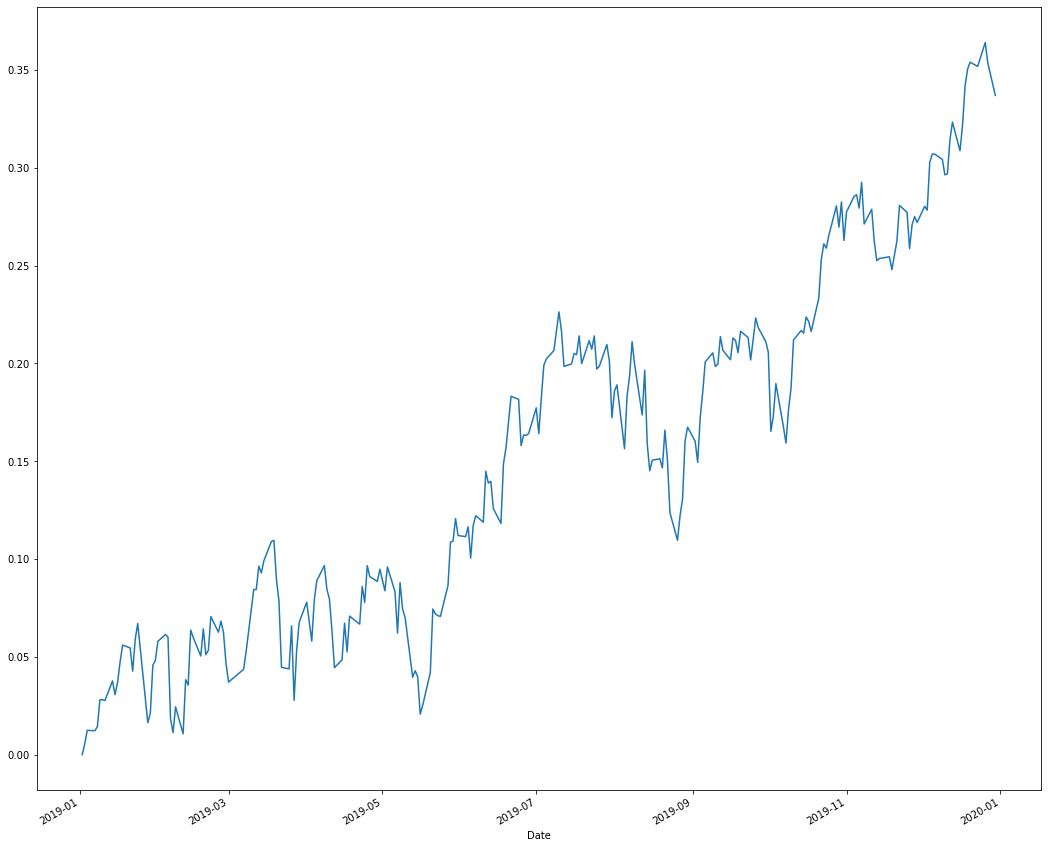

In [3]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.15, 0.14, 0.12, 0.11, 0.07, 0.06, 0.06, 0.04, 0.22, 0.04])

# Calculate the portfolio returns
StockReturns['Portfolio'] = StockReturns.mul(portfolio_weights, axis=1).sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

## Equal weighted portfolios

When comparing different portfolios, we often want to consider performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portfolio, we might want to consider another strategy, or simply opt for the naive approach if all else fails. We can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in our equally-weighted portfolio as Weg or JBS, for example.

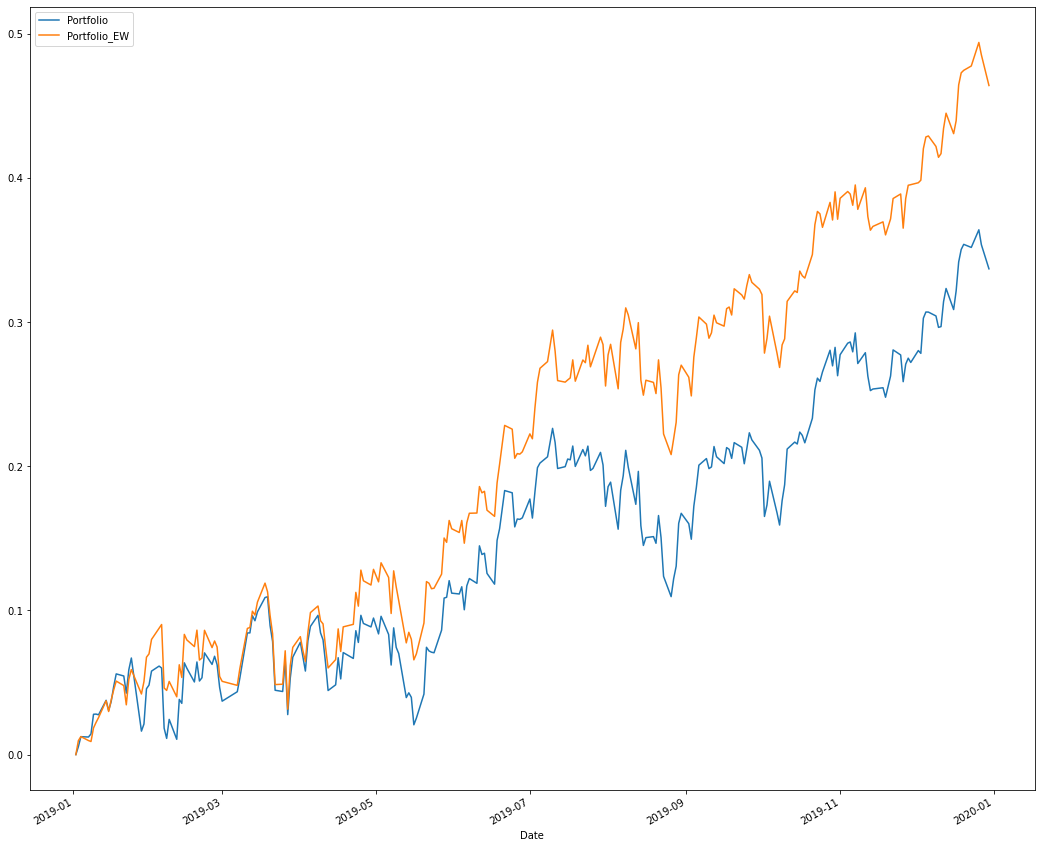

In [4]:
# How many stocks are in our portfolio?
numstocks = 10

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:,0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

CumulativeReturnsEW = ((1+StockReturns["Portfolio_EW"]).cumprod()-1)

CumulativeReturns.plot()
CumulativeReturnsEW.plot()
plt.legend()
plt.show()

## Market-cap weighted portfolios

Conversely, when large companies are doing well, market capitalization, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

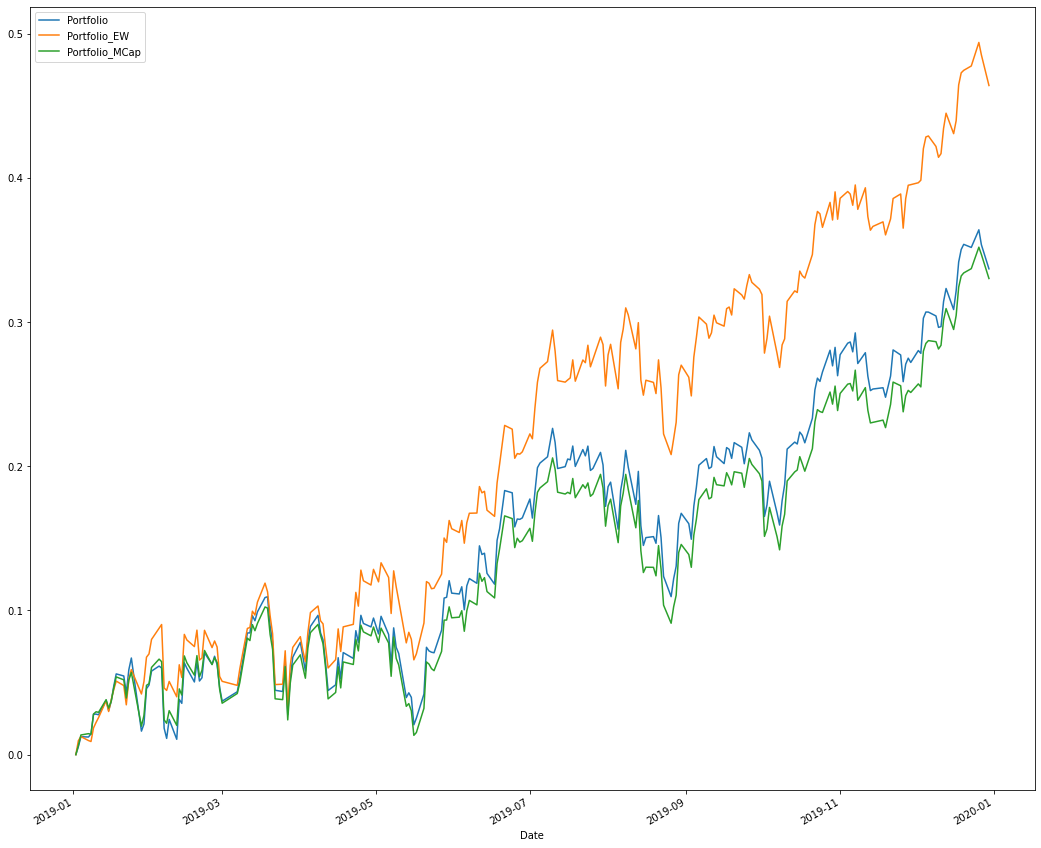

In [5]:
market_capitalizations = np.array([250.94, 113.17, 289.24, 181.71, 224.38, \
                                   114.40, 95.82, 104.77, 293.98,57.55])

# Calculate the market cap weights
mcap_weights = market_capitalizations/np.sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:10].mul(mcap_weights, axis=1).sum(axis=1)

CumulativeReturnsMCap = ((1+StockReturns["Portfolio_MCap"]).cumprod()-1)

CumulativeReturns.plot()
CumulativeReturnsEW.plot()
CumulativeReturnsMCap.plot()
plt.legend()
plt.show()

## Correlation matrix

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

In [6]:
# Calculate the correlation matrix
correlation_matrix = StockReturns.iloc[:, 0:10].corr()

# Print the correlation matrix
print(correlation_matrix)

Symbols   ITUB4.SA  B3SA3.SA  PETR4.SA  BBDC4.SA  ABEV3.SA  MGLU3.SA  \
Symbols                                                                
ITUB4.SA  1.000000  0.492841  0.441433  0.694393  0.299422  0.346445   
B3SA3.SA  0.492841  1.000000  0.483599  0.456619  0.348126  0.411380   
PETR4.SA  0.441433  0.483599  1.000000  0.443454  0.194822  0.288317   
BBDC4.SA  0.694393  0.456619  0.443454  1.000000  0.265147  0.310653   
ABEV3.SA  0.299422  0.348126  0.194822  0.265147  1.000000  0.247415   
MGLU3.SA  0.346445  0.411380  0.288317  0.310653  0.247415  1.000000   
BBAS3.SA  0.637288  0.526151  0.571677  0.595571  0.229067  0.369292   
WEGE3.SA  0.437784  0.489508  0.346185  0.342650  0.344670  0.287794   
VALE3.SA  0.144718  0.135554  0.326244  0.106823 -0.036052  0.099335   
JBSS3.SA  0.094671  0.186258  0.101371  0.205090  0.154513  0.064136   

Symbols   BBAS3.SA  WEGE3.SA  VALE3.SA  JBSS3.SA  
Symbols                                           
ITUB4.SA  0.637288  0.437784  0.1

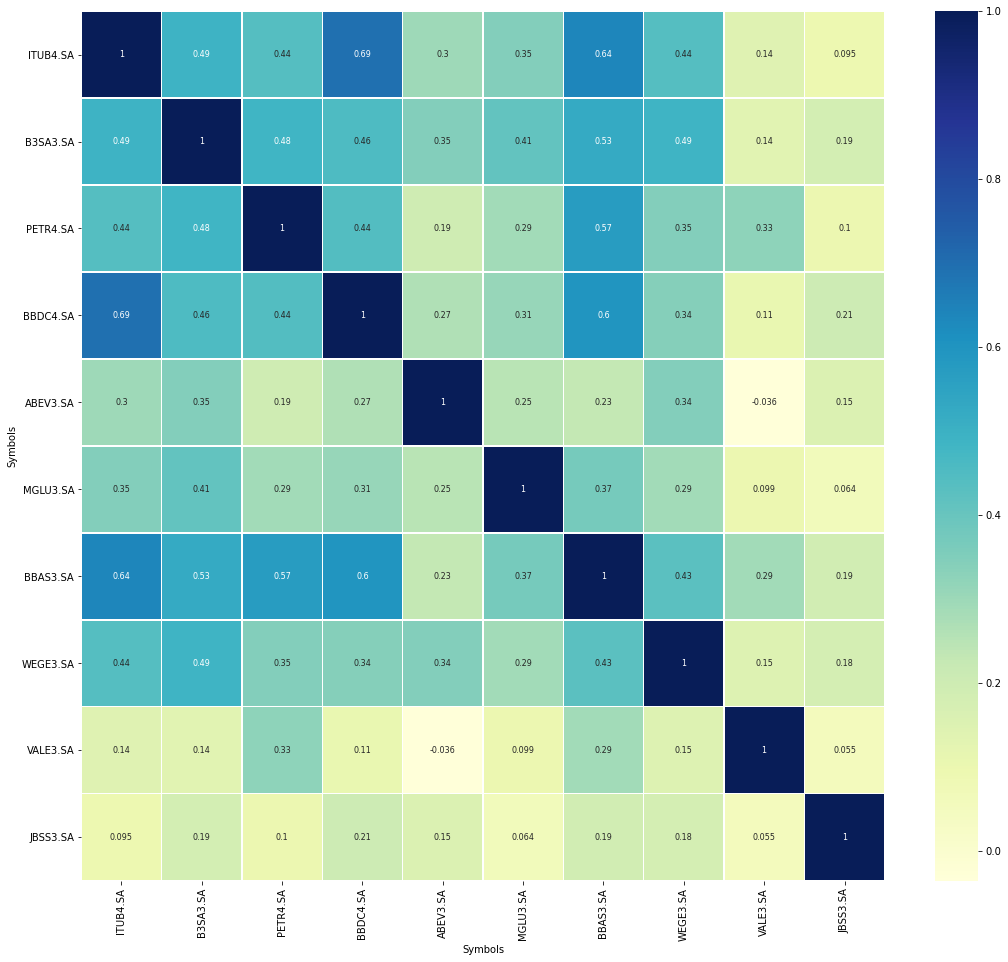

In [7]:
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

## Co-variance matrix

The correlation matrix doesn't really tell we anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information, and is very useful for portfolio optimization and risk management purposes.

In [8]:
# Calculate the covariance matrix
cov_mat = StockReturns.iloc[:, 0:10].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

Symbols   ITUB4.SA  B3SA3.SA  PETR4.SA  BBDC4.SA  ABEV3.SA  MGLU3.SA  \
Symbols                                                                
ITUB4.SA  0.060140  0.040969  0.030843  0.057459  0.019290  0.034783   
B3SA3.SA  0.040969  0.114907  0.046706  0.052228  0.031002  0.057092   
PETR4.SA  0.030843  0.046706  0.081176  0.042632  0.014582  0.033631   
BBDC4.SA  0.057459  0.052228  0.042632  0.113854  0.023504  0.042915   
ABEV3.SA  0.019290  0.031002  0.014582  0.023504  0.069017  0.026611   
MGLU3.SA  0.034783  0.057092  0.033631  0.042915  0.026611  0.167616   
BBAS3.SA  0.047365  0.054054  0.049364  0.060905  0.018238  0.045822   
WEGE3.SA  0.027437  0.042407  0.025207  0.029548  0.023141  0.030112   
VALE3.SA  0.014092  0.018245  0.036908  0.014312 -0.003761  0.016148   
JBSS3.SA  0.010318  0.028061  0.012836  0.030756  0.018041  0.011670   

Symbols   BBAS3.SA  WEGE3.SA  VALE3.SA  JBSS3.SA  
Symbols                                           
ITUB4.SA  0.047365  0.027437  0.0

## Portfolio standard deviation

In order to calculate portfolio volatility, we will need the covariance matrix, the portfolio weights, and knowledge of the transpose operation. The transpose of a numpy array can be calculated using the .T attribute. The np.dot() function is the dot-product of two arrays.


In [9]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility) # The portfolio volatility is 20.5%

0.20499866363542973


## Sharpe ratios

The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, we are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

The original 1966 Sharpe ratio calculation is quite simple:

S=Ra−rfσa
S: Sharpe Ratio
Ra: Asset return
rf: Risk-free rate of return
σa: Asset volatility
The randomly generated portfolio is available as RandomPortfolios.

In [10]:
# Risk free rate
risk_free = 4.5/100

num_portfolios = 10000
weight_array = []
returns_array = []
volatility_array = []
for i in range(num_portfolios):
    # Randomly assign floats to our 10 equities
    weights = np.random.random(numstocks)
    # Convert the randomized floats to percentages (summing to 100)
    weights /= np.sum(weights)
    # Add to our portfolio weight array
    weight_array.append(weights)
    
    WeightedPortfolio = StockReturns.iloc[:, 0:10].mul(weights, axis=1).sum(axis=1)
    ReturnsMSR = ((1+WeightedPortfolio).cumprod()-1)
    returns_array.append(ReturnsMSR[-1])
    
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_mat_annual, weights)))
    volatility_array.append(volatility)
    
RandomPortfolios = pd.DataFrame(weight_array, columns=StockReturns.iloc[:, 0:10].columns)
RandomPortfolios['Returns'] = returns_array
RandomPortfolios['Volatility'] = volatility_array

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free)/RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.809591
max    3.482660
Name: Sharpe, dtype: float64


## MSR portfolio

The maximum Sharpe ratio, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

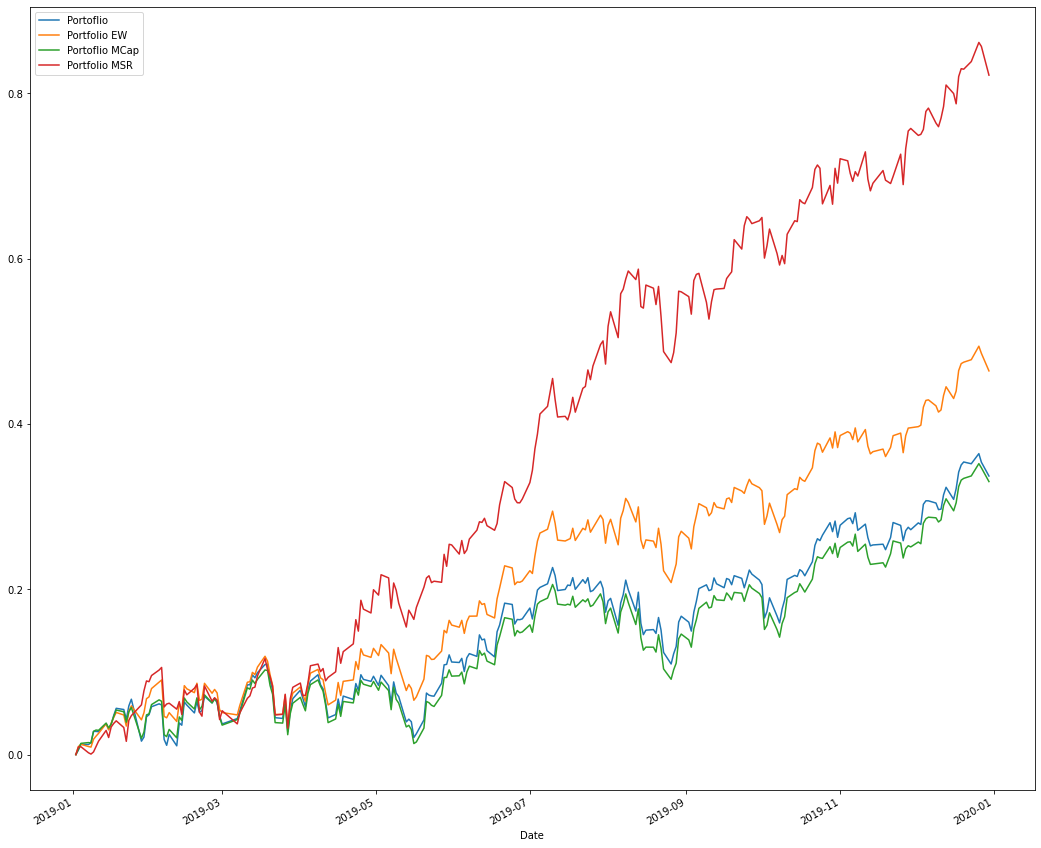

In [11]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR(maximum Sharpe Ratio) weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
CumulativeReturnsMSR = ((1+StockReturns["Portfolio_MSR"]).cumprod()-1)

CumulativeReturns.plot()
CumulativeReturnsEW.plot()
CumulativeReturnsMCap.plot()
CumulativeReturnsMSR.plot()
plt.legend(['Portoflio','Portfolio EW','Portoflio MCap','Portfolio MSR'])
plt.show()

# We just optimized our first portfolio - 
# but past performance does not guarantee future results. Returns are harder to predict, making the MSR unstable.

## GMV portfolio

The global minimum volatility portfolio, or GMV portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.

Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

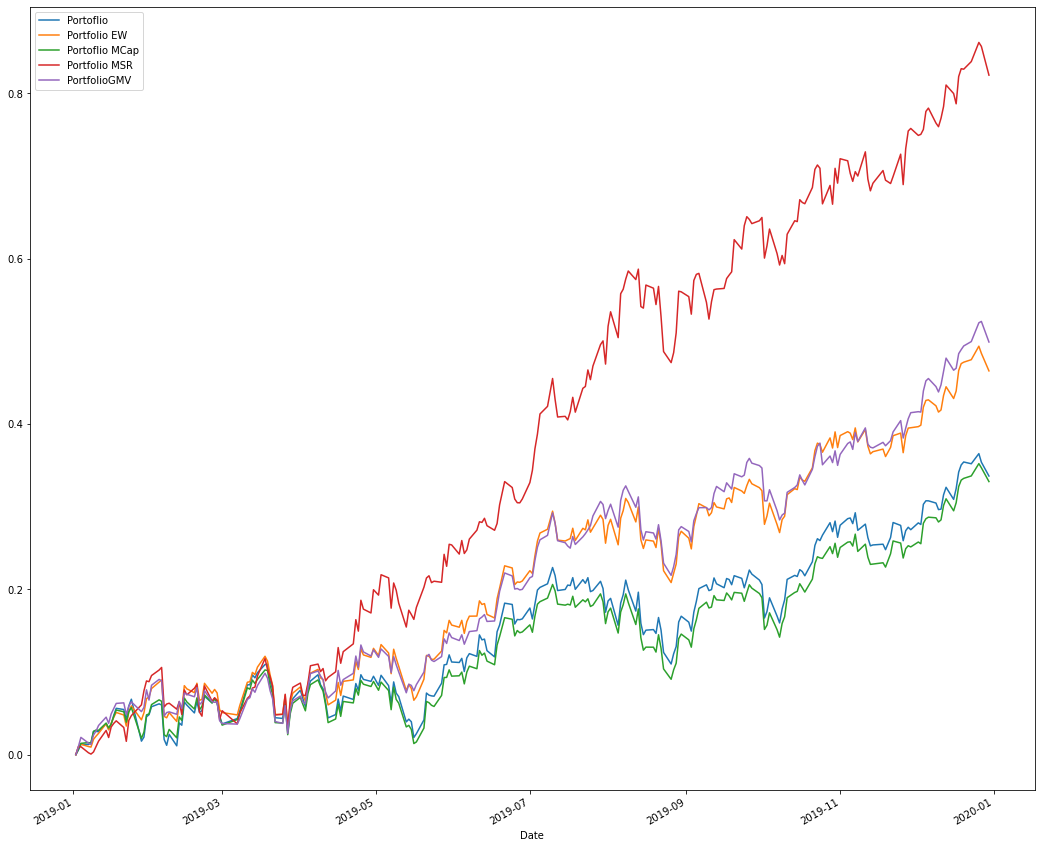

In [12]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
CumulativeReturnsGMV = ((1+StockReturns["Portfolio_GMV"]).cumprod()-1)

CumulativeReturns.plot()
CumulativeReturnsEW.plot()
CumulativeReturnsMCap.plot()
CumulativeReturnsMSR.plot()
CumulativeReturnsGMV.plot()
plt.legend(['Portoflio','Portfolio EW','Portoflio MCap','Portfolio MSR','PortfolioGMV'])
plt.show()